In [2]:
import pandas as pd
train_data= pd.read_csv('C:/Users/Hema Chandran/anacond/pkgs/ipykernel-6.25.0-py311h746a85d_0/Lib/site-packages/finalproj/p2_train.csv') # read the csv file as a dataframe
test_data= pd.read_csv('C:/Users/Hema Chandran/anacond/pkgs/ipykernel-6.25.0-py311h746a85d_0/Lib/site-packages/finalproj/p2_test.csv')

In [3]:
print(train_data.shape)
print(test_data.shape)

(9999, 4)
(4999, 4)


In [4]:
train_data.head(5)

,6.501995617291942864e+00,-8.536982980274247623e+00,3.422934674177284364e+00,1.199802202461145789e+05
0,1.328383,8.943578,-8.145307,29890.224974
1,0.161478,-7.928351,1.628924,3245.579405
2,-8.989890,0.621330,-2.322925,411824.663771
3,5.185118,7.902611,7.559619,176097.137744
4,6.143466,9.274312,-0.544850,99400.008678


In [5]:
x = train_data.iloc[:,0:3]

y = train_data.iloc[:,3]

x_test = test_data.iloc[:,0:3]

y_test = test_data.iloc[:,3]
print(x_test.head(5))
#print(y_test.head(5))

   -1.453097910426269124e+00  -3.535848257385223903e+00  \
0                  -0.951478                  -4.954119   
1                   3.876805                   9.707116   
2                   4.944532                   8.173724   
3                   8.422242                   1.181565   
4                   3.783887                  -0.606017   

   4.957581238204904039e+00  
0                 -4.572673  
1                  6.012681  
2                  2.526409  
3                  3.208955  
4                 -7.682480  


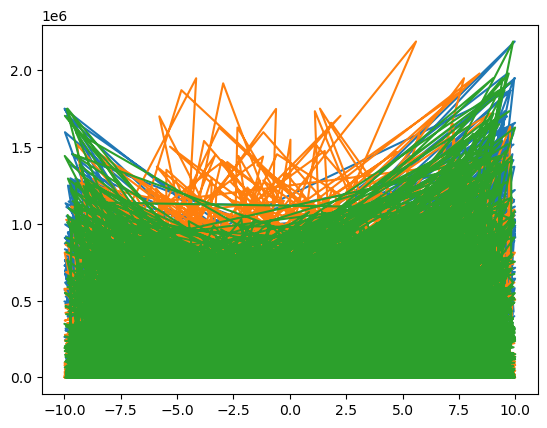

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
fig = plt.figure()
plt.plot(x,y)

plt.show()


In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x,y)

LinearRegression()

In [12]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

poly_features = polynomial_converter.fit_transform(x)
poly_features.shape

(9999, 9)

In [18]:
# Perform polynomial regression with gradient descent
def polynomial_regression(x, coeffs):
    return np.dot(np.column_stack([x**i for i in range(degree + 1)]), coeffs)

def compute_cost(x, y, coeffs):
    m = len(y)
    predictions = polynomial_regression(x, coeffs)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

def gradient_descent(x, y, coeffs, learning_rate, n_iterations):
    m = len(y)
    cost_history = []
    for _ in range(n_iterations):
        predictions = polynomial_regression(x, coeffs)
        errors = predictions - y
        gradient = (1 / m) * np.dot(np.column_stack([x**i for i in range(degree + 1)]).T, errors)
        coeffs -= learning_rate * gradient
        cost = compute_cost(x, y, coeffs)
        cost_history.append(cost)
    return coeffs, cost_history

# Perform gradient descent to fit the polynomial
coeffs, cost_history = gradient_descent(x, y, coeffs, learning_rate, n_iterations)

# Plot the data points
plt.scatter(x, y, label='Data', color='blue')

# Plot the polynomial fit
fit_x = np.linspace(-5, 5, 100)
fit_y = polynomial_regression(fit_x, coeffs)
plt.plot(fit_x, fit_y, label='Polynomial Fit', color='red')

plt.legend()
plt.title(f'Polynomial Regression with Degree {degree}')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Plot how the loss changes over iterations
plt.plot(range(n_iterations), cost_history)
plt.title('Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

NameError: name 'coeffs' is not defined